In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('customer churn.csv')

In [4]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


# replacing blanks with 0as tenure is 0 and no total charges are recorded


In [5]:
df["TotalCharges"]=df["TotalCharges"].replace("  ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")
                                               

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum().sum()


np.int64(11)

In [9]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.435752,64.761692,2283.300441
std,25.075228,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,458.000000,118.750000,8684.800000


In [10]:
df["customerID"].duplicated().sum()

np.int64(0)

#convert 0and 1 values of senior citizen to yes/no to make it easier to understand

In [13]:
def convert(value):
    if value==1:
        return"yes"
    else :
       return "no"
df["SeniorCitizen"]=df["SeniorCitizen"].apply(convert)        

In [14]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


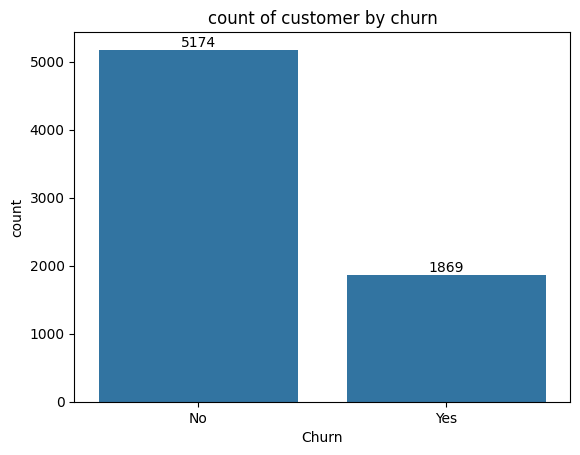

In [15]:
ax=sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.title("count of customer by churn")
plt.show()

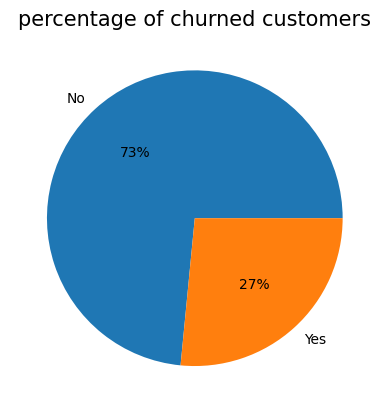

In [16]:
gb=df.groupby("Churn").agg({"Churn":"count"})
gb
plt.pie(x="Churn",data=gb,labels=gb.index,autopct="%0.0f%%")
plt.title("percentage of churned customers",fontsize=15)
plt.show()

#from the given pie chart we can conclude that 27% of our customers have churned out.
#now let's explore the reason behind it

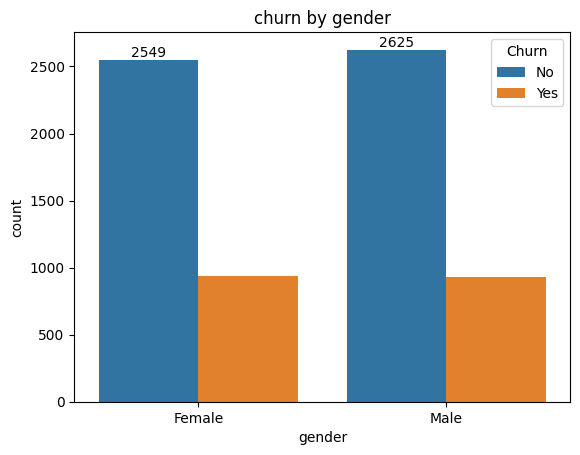

In [17]:
t=sns.countplot(x="gender",data=df,hue="Churn")
t.bar_label(t.containers[0])
plt.title("churn by gender")
plt.show()

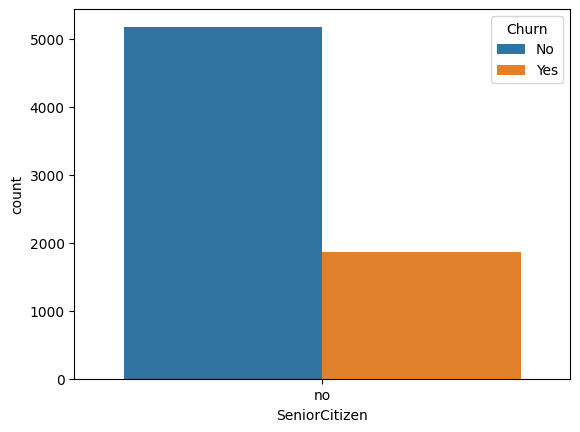

<Figure size 100x100 with 0 Axes>

In [18]:
sns.countplot(x="SeniorCitizen",data=df,hue="Churn")
plt.figure(figsize=(1,1))
plt.show()

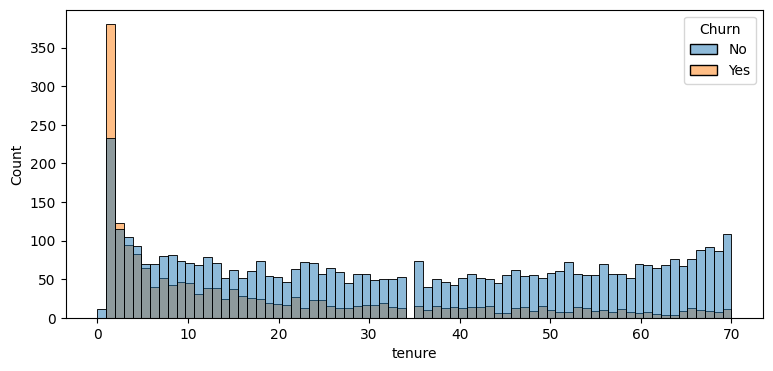

In [19]:
plt.figure(figsize=(9,4))
sns.histplot(bins=72,binrange=(0,70),x="tenure",data=df,hue="Churn")
plt.show()

#people who have used our services for a long time have stayed and people who have used our services #1 or 2 months have churned

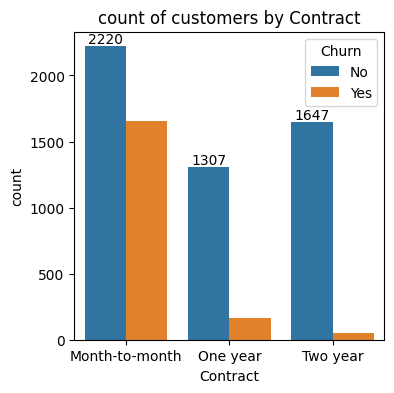

In [20]:
plt.figure(figsize=(4,4))
y=sns.countplot(x="Contract",data=df, hue="Churn")
y.bar_label(y.containers[0])
plt.title("count of customers by Contract")
plt.show()

#people who have month  to month contact are likely to churn then from those who have 1 or 2 years of contract

In [21]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

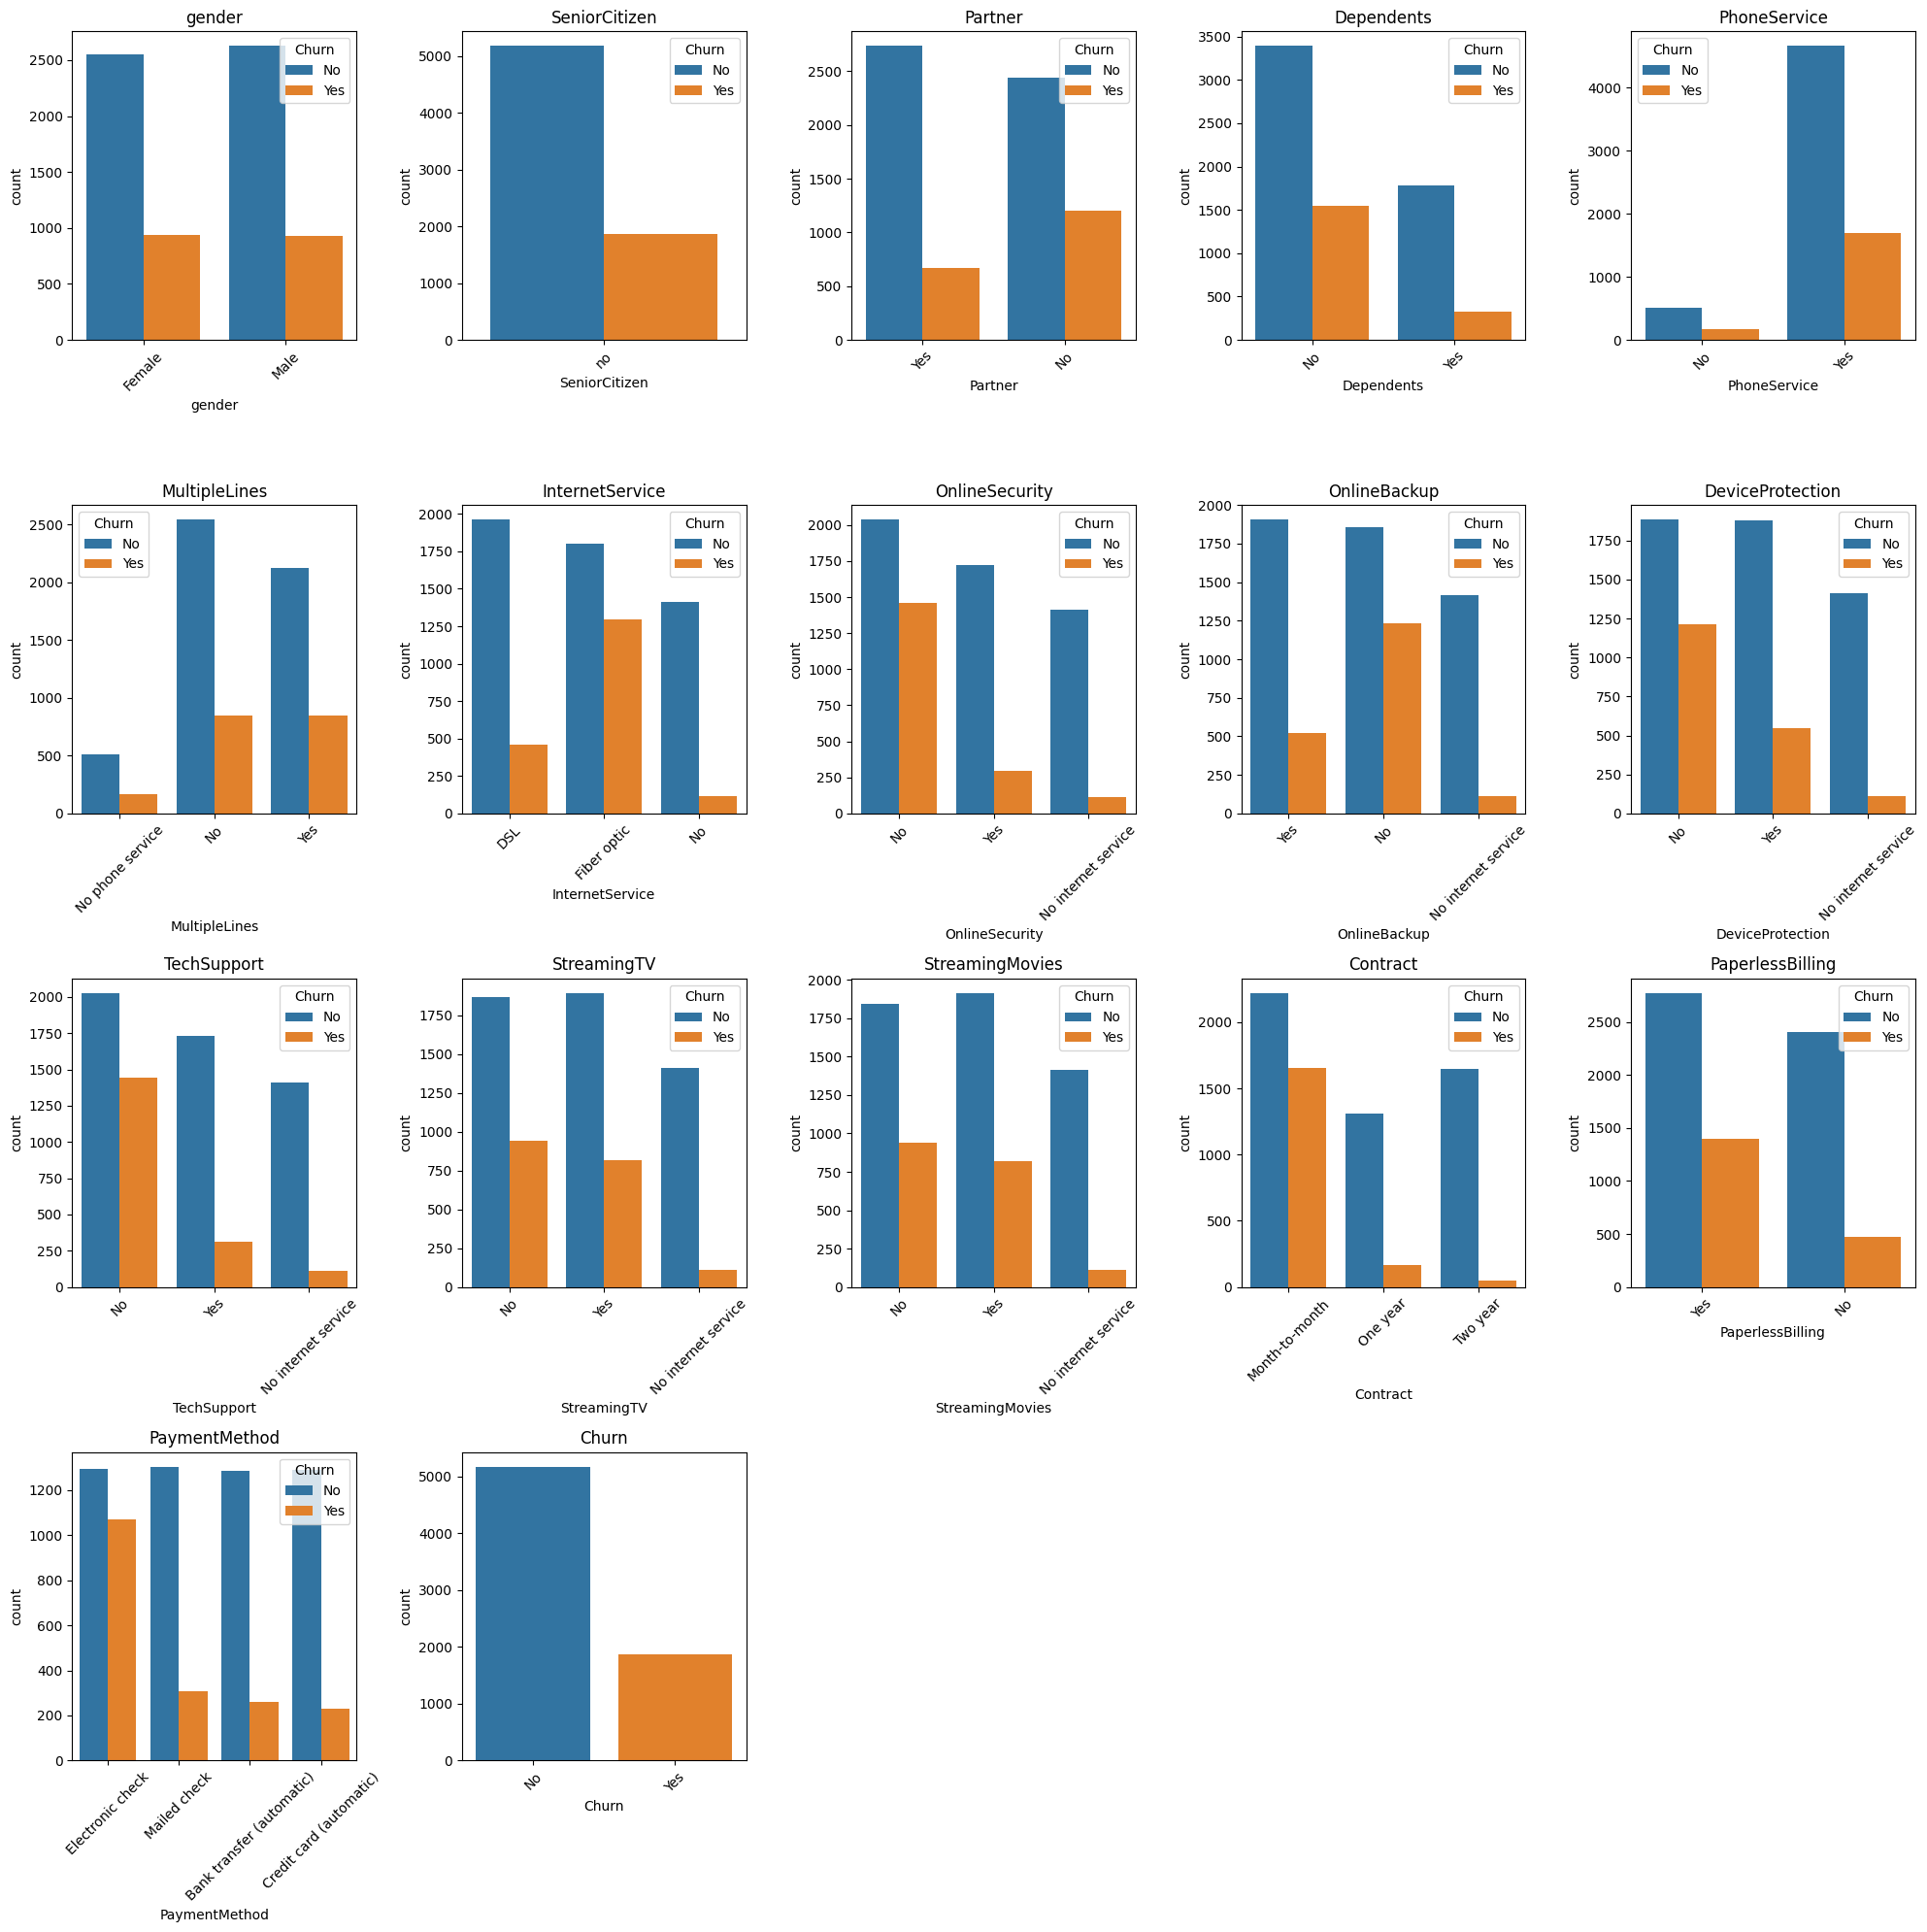

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns (excluding customerID, tenure, charges)
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Set up the plot grid (e.g., 4 rows x 5 columns)
plt.figure(figsize=(20, 20))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 5, i)  # 4 rows, 5 columns layout
    sns.countplot(data=df, x=column,hue=df["Churn"])
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#These bar plots show customer churn distribution across categorical variables like gender, internet service, and contract type. 
#Blue bars indicate non-churners and orange indicate churners. Higher churn is seen among customers with month-to-month contracts, no tech support,or online security. 
#Key service-related features strongly influence churn behavior.

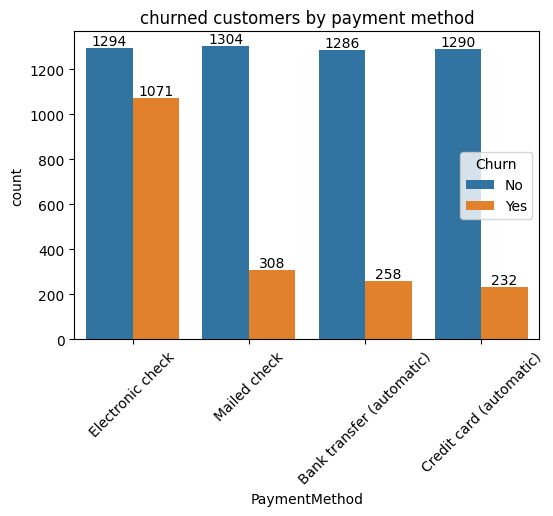

In [50]:
plt.figure(figsize= (6,4))
AX=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
for container in AX.containers:
    AX.bar_label(container)
plt.title("churned customers by payment method")
plt.xticks(rotation=45)
plt.show()

#customer is likely to churn when he is using electronic check as a payment method.